# Noising Experiments
In this notebook i will:
1. Insert noise (with different parameters, if applicable) in a default image (colored noise k = 6)
2. Extract the metrics of the noised images with different parameters
3. Generate the curve that represents the noise used
4. Insert noise on images of the dataset and see if it gets near the curve generated at step 3

## Poisson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import utils.utils as utils_functions
import utils.noise_generator as noise_gen
from utils.images_generator import poisson_noise, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info
from skimage import data
from skimage.color import rgb2gray

### Default Image

Generating default image

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:51: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:51: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


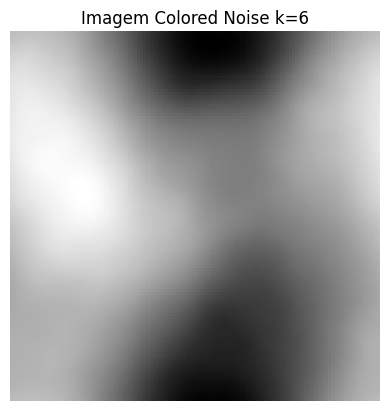

(122, 122)


In [2]:
# generates the default image (colored noise k=6)
gs_image = colored_noise(6, (122, 122))
# normalize to 0-255
gs_image = normalize_img_to_0_255(gs_image)
plt.imshow(gs_image, cmap='gray')
plt.title(f"Imagem Colored Noise k=6")
plt.axis('off')  # Remove os eixos
plt.show()
print(gs_image.shape)

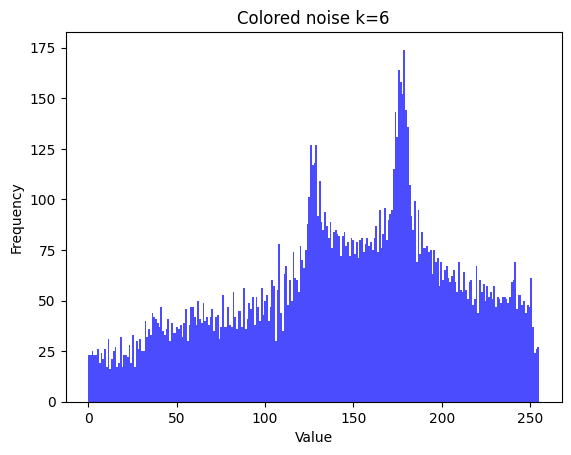

In [3]:
generate_histogram(gs_image, isNormalized=True, title=f'Colored noise k=6')

Generating the noised images

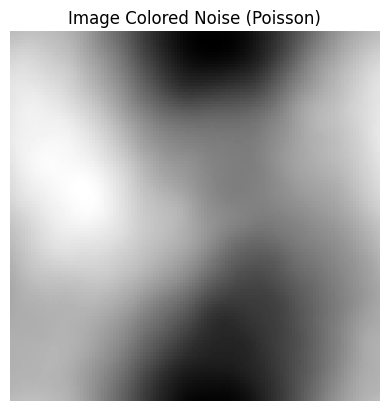

(122, 122)


In [5]:
noised_image = poisson_noise(gs_image)
plt.imshow(noised_image, cmap='gray')
plt.title(f"Image Colored Noise (Poisson)")
plt.axis('off')
plt.show()
print(noised_image.shape)

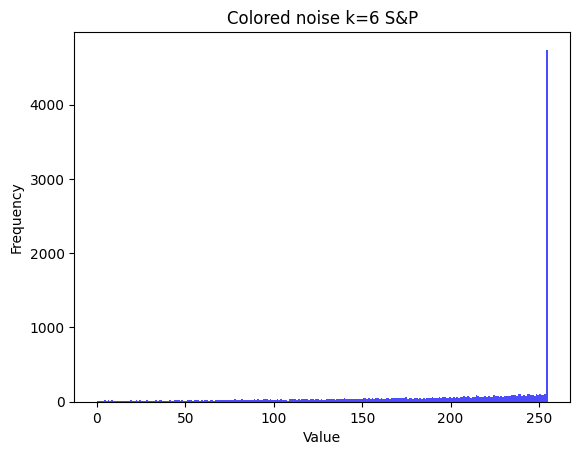

In [22]:
generate_histogram(noised_image, isNormalized=True, title=f'Colored noise k=6 S&P')

In [2]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
# stores all the metrics of each image in a list
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    noised_image = speckle_noise_gs(gs_image)
    # extract metrics
    print("Extracting data")
    noised_image_data = get_img_info(noised_image, q_linspace = np.linspace(-2, 20, num = 23))
    # add the information
    noised_image_data['image_name'] = gs_image_name
    image_data_list.append(noised_image_data)
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/noise_analysis/speckle/speckle_analysis_default.csv", index = False)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data
Extracting data


In [7]:
print(noised_image_data.shape)
noised_image_data.head()

(23, 9)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,-2.0,0.247617,0.228636,0.549869,0.271233,0.580950,0.323843,0.095207,default
1,-1.0,0.058404,0.071216,0.981141,0.022221,0.391737,0.339739,0.268523,default
2,0.0,0.000387,-0.006762,0.999673,0.000428,0.333720,0.329759,0.336521,default
3,1.0,-0.005106,-0.006888,0.999523,0.000623,0.328227,0.332442,0.339331,default
4,2.0,-0.008887,-0.007624,0.999207,0.001038,0.324446,0.333965,0.341589,default


### Dataset Images
1. Take 1 image from each of the 25 classes of the Sintorn Dataset
2. Insert noise with different probabilities
3. extract metrics and insert in the previous dataframe

In [23]:
# reads 1 image from each class
images_path = f'data/Sintorn/hardware'
rot = 'r000'
seg = 's001'
images_filenames = []
for file in os.listdir(images_path):
    if file.endswith(f"{rot}-{seg}.png"):
        images_filenames.append(file)
print(len(images_filenames))

25


Testing histogram

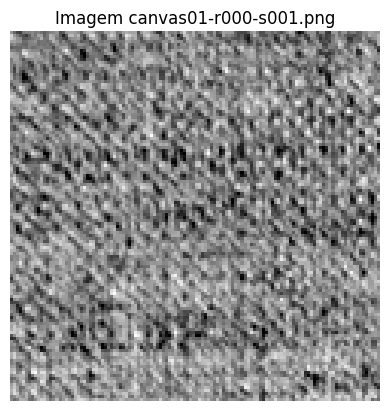

(122, 122)


In [24]:
img_filename = images_filenames[1]
gs_image = cv2.imread(f'{images_path}/{img_filename}', cv2.IMREAD_GRAYSCALE)
plt.imshow(gs_image, cmap='gray')
plt.title(f"Imagem {img_filename}")
plt.axis('off')  # Remove os eixos
plt.show()
print(gs_image.shape)

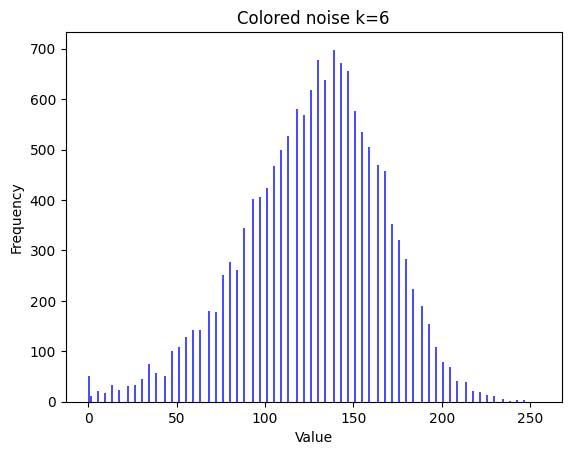

In [25]:
generate_histogram(gs_image, isNormalized=True, title=f'Colored noise k=6')

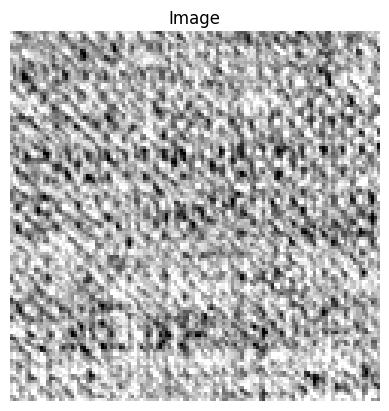

(122, 122)


In [26]:
noised_image = add_speckle_noise(gs_image, intensity=0.7, mean=0.5, sigma=0.1)
plt.imshow(noised_image, cmap='gray')
plt.title(f"Image")
plt.axis('off')
plt.show()
print(noised_image.shape)

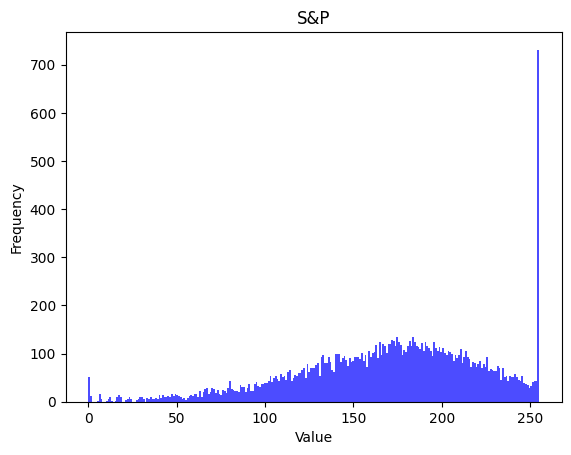

In [27]:
generate_histogram(noised_image, isNormalized=True, title=f'S&P')

Extracting metrics for each image with each parameter

In [14]:
image_data_list = []
for idx, img_filename in enumerate(images_filenames):
    # reads the image
    gs_image = cv2.imread(f'{images_path}/{img_filename}', cv2.IMREAD_GRAYSCALE)
    image_title = img_filename.split('.')[0]
    print(image_title, f"{idx+1}/{len(images_filenames)}")
    # adds noise
    noised_image = speckle_noise_gs(gs_image)
    # extract metrics
    print("\tExtracting data")
    noised_image_data = get_img_info(noised_image, q_linspace = np.linspace(-2, 20, num = 23))
    # add the information
    noised_image_data['image_name'] = img_filename
    image_data_list.append(noised_image_data)

canesugar01-r000-s001 1/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


canvas01-r000-s001 2/25
	Extracting data
couscous01-r000-s001 3/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


fabric01-r000-s001 4/25
	Extracting data
fabric02-r000-s001 5/25
	Extracting data
fabric03-r000-s001 6/25
	Extracting data
fabric04-r000-s001 7/25
	Extracting data
fabric05-r000-s001 8/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


flaxseed01-r000-s001 9/25
	Extracting data
knitwear01-r000-s001 10/25
	Extracting data
knitwear02-r000-s001 11/25
	Extracting data
knitwear03-r000-s001 12/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


lentils01-r000-s001 13/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


oatmeal01-r000-s001 14/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


pearlsugar01-r000-s001 15/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


rice01-r000-s001 16/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


rug01-r000-s001 17/25
	Extracting data
ryeflakes01-r000-s001 18/25
	Extracting data
seeds01-r000-s001 19/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


seeds02-r000-s001 20/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


sprinkles01-r000-s001 21/25
	Extracting data
tile01-r000-s001 22/25
	Extracting data


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


towel01-r000-s001 23/25
	Extracting data
wheat01-r000-s001 24/25
	Extracting data
wool01-r000-s001 25/25
	Extracting data


In [15]:
data_ss = pd.concat(image_data_list, ignore_index=True)
data_ss.to_csv(f"results/noise_analysis/speckle/speckle_analysis.csv", index = False)

### Scikit Images

In [20]:
def this_add_poisson_noise_claude(image=np.ones((256, 256)), factor=1.0):
    """
    Add poisson noise to an image.
    
    Parameters:
    image (numpy.ndarray(np.float64)): Input image (Intensities in range [0, 1])
    factor (float): Scaling factor to control noise intensity. Higher values produce more noise. (default 1.0)
    
    Returns:
    numpy.ndarray(np.float64): Image with added poisson noise
    """
    # check if input is a numpy array
    if not isinstance(image, np.ndarray):
        raise TypeError("Input must be a numpy array")
    
    # check if dtype is float64
    if image.dtype != np.float64:
        raise ValueError("Image must be of dtype float64")
    
    # check if pixel values are in range [0, 1]
    if image.min() < 0 or image.max() > 1:
        raise ValueError("Pixel values must be in the range [0, 1]")
    
    # scale image to adjust noise level (higher values = more noise)
    scaled_img = image * factor
    
    # generate poisson noise
    # For each pixel value λ, generate a random value from Poisson(λ)
    # Then divide by factor to bring back to original scale
    noisy = np.random.poisson(scaled_img * 255.0) / 255.0 / factor
    
    # Clip values to valid range
    noisy = np.clip(noisy, 0.0, 1.0)    
        
    return noisy

def add_poisson_noise_claude2(image=np.ones((256, 256)), factor=1.0):
    """
    Add poisson noise to an image.
    
    Parameters:
    image (numpy.ndarray(np.float64)): Input image (Intensities in range [0, 1])
    factor (float): Scaling factor to control noise intensity. Higher values produce more noise. 
                    Factor=0 produces no noise. (default 1.0)
    
    Returns:
    numpy.ndarray(np.float64): Image with added poisson noise
    """
    # Check if input is a numpy array
    if not isinstance(image, np.ndarray):
        raise TypeError("Input must be a numpy array")
    
    # Check if dtype is float64
    if image.dtype != np.float64:
        raise ValueError("Image must be of dtype float64")
    
    # Check if pixel values are in range [0, 1]
    if image.min() < 0 or image.max() > 1:
        raise ValueError("Pixel values must be in the range [0, 1]")
    
    # Special case: if factor=0, return original image without noise
    if factor == 0:
        return image.copy()
    
    # Scale image to adjust noise level (higher values = more noise)
    # Use the original image as lambda values for Poisson distribution
    # Higher factor = more variation from original value
    
    # Generate Poisson noise
    # For each pixel value λ, generate a random value from Poisson(λ)
    noisy = np.random.poisson(image * 255.0 / factor) * factor / 255.0
    
    # extracts the min and max of the noised image
    noisy_min = noisy.min()
    noisy_max = noisy.max()    
    # normalize to [0, 1]
    normalized = (noisy - noisy_min) / (noisy_max - noisy_min)
    
    return normalized

def this_add_poisson_noise_scikit(image=np.ones((256, 256)), factor=1.0):
    # check if input is a numpy array
    if not isinstance(image, np.ndarray):
        raise TypeError("Input must be a numpy array")
    
    # check if dtype is float64
    if image.dtype != np.float64:
        raise ValueError("Image must be of dtype float64")
    
    # check if pixel values are in range [0, 1]
    if image.min() < 0 or image.max() > 1:
        raise ValueError("Pixel values must be in the range [0, 1]")
    # since it is getting the power of two, should be [0, 255]
    image_int = (image*255).astype(np.uint8)
    # Determine unique values in image & calculate the next power of two
    vals = len(np.unique(image_int))
    vals = 2 ** np.ceil(np.log2(vals))

    # Generating noise for each unique value in image.
    noisy = np.random.poisson(image_int * vals) / float(vals)
        
    return noisy
def this_add_poisson_noise_stackoverflow(image=np.ones((256, 256)), factor=1.0):
    # check if input is a numpy array
    if not isinstance(image, np.ndarray):
        raise TypeError("Input must be a numpy array")
    
    # check if dtype is float64
    if image.dtype != np.float64:
        raise ValueError("Image must be of dtype float64")
    
    # check if pixel values are in range [0, 1]
    if image.min() < 0 or image.max() > 1:
        raise ValueError("Pixel values must be in the range [0, 1]")
    
    noisy = np.random.poisson(image * 255.0 * factor) / factor / 255  # noisy image

    # extracts the min and max of the noised image
    noisy_min = noisy.min()
    noisy_max = noisy.max()    
    # normalize to [0, 1]
    normalized = (noisy - noisy_min) / (noisy_max - noisy_min)
        
    return normalized

float64
MIN 0.00392156862745098 MAX 0.9882352941176471


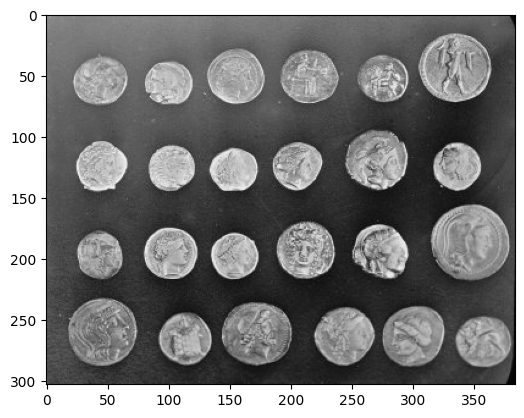

In [2]:
astronaut_image = data.astronaut()
astronaut_image = (rgb2gray(astronaut_image)*255).astype(np.uint8)
astronaut_image = data.coins()
astronaut_image_float = utils_functions.normalize_uint8_to_float64(data.coins())
plt.imshow(astronaut_image_float, cmap='gray')
print(astronaut_image_float.dtype)
print("MIN", astronaut_image_float.min(), "MAX", astronaut_image_float.max())

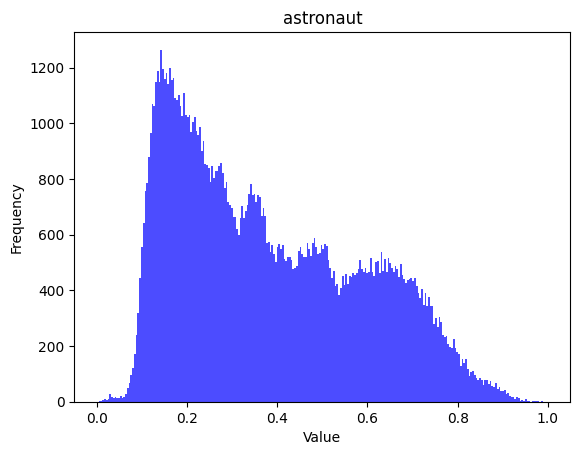

In [3]:
generate_histogram(astronaut_image_float, isNormalized=True, title=f'astronaut', range=(0,1))

float64
0.0
1.0


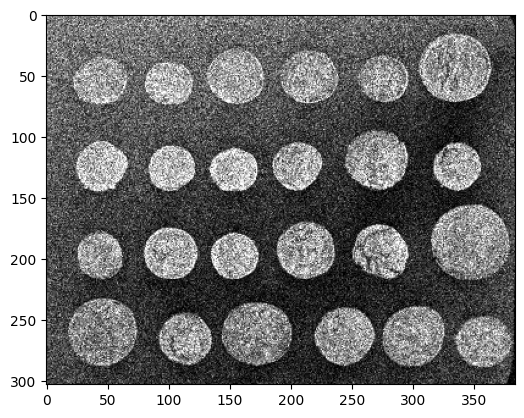

In [24]:
factor = 15
noised_image = noise_gen.add_poisson_noise(astronaut_image_float, factor)
plt.imshow(noised_image, cmap='gray')
print(noised_image.dtype)
print(noised_image.min())
print(noised_image.max())

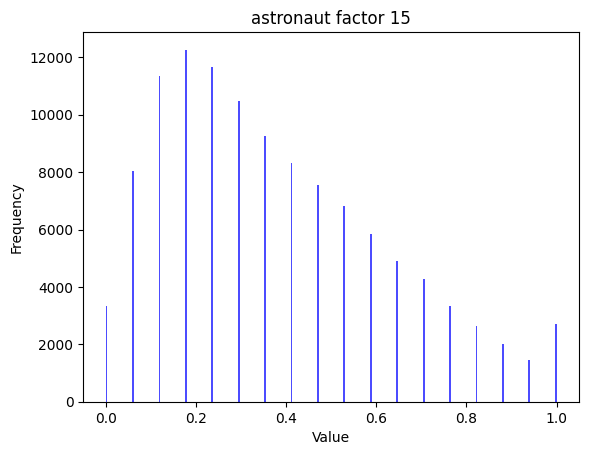

In [25]:
generate_histogram(noised_image, isNormalized=True, title=f'astronaut factor {factor}', range=(0,1))

In [6]:
from skimage import data
from skimage.color import rgb2gray

# images need to be in range (0,1) and dtype float64
skimage_images = {
    'data.astronaut': rgb2gray(data.astronaut()),
    'data.cat': rgb2gray(data.cat()),
    'data.coins': utils_functions.normalize_uint8_to_float64(data.coins())
}

In [7]:
# sets the factors used
factors = [0.0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5,
           3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0, 30.0, 50.0]
q_linspace = np.linspace(-2, 20, num = 23)
q_linspace = [0]
image_data_list = []
for idx, skimage_name in enumerate(skimage_images):
    # reads the image
    gs_image = skimage_images[skimage_name]
    image_title = skimage_name.split('.')[1]
    print(image_title, f"{idx+1}/{len(skimage_images)}")
    # adds noise
    for factor_value in factors:
        print(f"Factor = {factor_value}")
        # generate noise image
        print("\tGenerating noised image")
        noised_image = noise_gen.add_poisson_noise_normalized(gs_image, factor_value)
        # extract metrics
        print("\tExtracting data")
        noised_image_data = get_img_info(noised_image, q_linspace = [0])
        # add the information
        noised_image_data['image_name'] = skimage_name
        noised_image_data['noise_factor'] = factor_value
        image_data_list.append(noised_image_data)

astronaut 1/3
Factor = 0.0
	Generating noised image
	Extracting data
Factor = 0.05
	Generating noised image
	Extracting data
Factor = 0.1
	Generating noised image
	Extracting data
Factor = 0.2
	Generating noised image
	Extracting data
Factor = 0.3
	Generating noised image
	Extracting data
Factor = 0.5
	Generating noised image
	Extracting data
Factor = 0.75
	Generating noised image
	Extracting data
Factor = 1.0
	Generating noised image
	Extracting data
Factor = 1.5
	Generating noised image
	Extracting data
Factor = 2.0
	Generating noised image
	Extracting data
Factor = 2.5
	Generating noised image
	Extracting data
Factor = 3.0
	Generating noised image
	Extracting data
Factor = 4.0
	Generating noised image
	Extracting data
Factor = 5.0
	Generating noised image
	Extracting data
Factor = 6.0
	Generating noised image
	Extracting data
Factor = 8.0
	Generating noised image
	Extracting data
Factor = 10.0
	Generating noised image
	Extracting data
Factor = 15.0
	Generating noised image
	Extracti

In [8]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_factor
0,0,0.226687,0.149256,0.942420,0.066415,0.560020,0.294618,0.145362,data.astronaut,0.00
1,0,0.177204,0.116900,0.959459,0.045795,0.510537,0.303181,0.186281,data.astronaut,0.05
2,0,0.162927,0.106521,0.963080,0.041216,0.496260,0.305131,0.198609,data.astronaut,0.10
3,0,0.146241,0.095741,0.966373,0.036877,0.479575,0.308083,0.212342,data.astronaut,0.20
4,0,0.137111,0.086856,0.967625,0.035043,0.470445,0.308206,0.221349,data.astronaut,0.30
...,...,...,...,...,...,...,...,...,...,...
58,0,0.020643,0.021744,0.989722,0.013169,0.353976,0.333884,0.312140,data.coins,10.00
59,0,0.019398,0.018787,0.984145,0.020221,0.352731,0.333028,0.314241,data.coins,15.00
60,0,0.022156,0.014317,0.979031,0.026474,0.355489,0.329414,0.315097,data.coins,20.00
61,0,0.028432,0.012294,0.966494,0.041740,0.361766,0.325264,0.312970,data.coins,30.00


In [9]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/noise_analysis/poisson/poisson_analysis_skimage_noisegen_normalized.csv", index = False)

### Plotting

In [3]:
image_data = pd.read_csv(f"results/noise_analysis/speckle/speckle_analysis.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/speckle/speckle_analysis_default.csv")
image_data.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,-2.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png
1,-1.0,NaN,0.000000,-0.000000,NaN,NaN,0.000000,0.000000,canesugar01-r000-s001.png
2,0.0,0.000592,0.014890,0.999802,0.000260,0.333925,0.340482,0.325593,canesugar01-r000-s001.png
3,1.0,0.001263,0.009715,0.999772,0.000298,0.334596,0.337559,0.327844,canesugar01-r000-s001.png
4,2.0,0.002683,0.008829,0.999578,0.000552,0.336016,0.336406,0.327577,canesugar01-r000-s001.png


In [4]:
filenames = image_data.image_name.unique()
print(filenames)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']


In [5]:
# default_data = image_data[(image_data['image_name'] == 'default')]
default_data = image_data_default # pega mais valores de probabilidade de s&p
dataset_data = image_data[image_data['image_name'] != 'default']

In [11]:
print(default_data.shape)
default_data.head()

(46, 9)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,-2.0,0.332989,-0.012695,0.706528,0.220484,0.666323,0.160491,0.173186,colored_k6
1,-1.0,0.036097,0.044537,0.992841,0.009109,0.369431,0.337553,0.293016,colored_k6
2,0.0,0.003392,0.016187,0.999702,0.000389,0.336726,0.339731,0.323543,colored_k6
3,1.0,0.005488,0.009680,0.999657,0.000449,0.338821,0.335429,0.325750,colored_k6
4,2.0,0.007775,0.011080,0.999433,0.000742,0.341109,0.334986,0.323905,colored_k6


Plotting noise characteristic curve

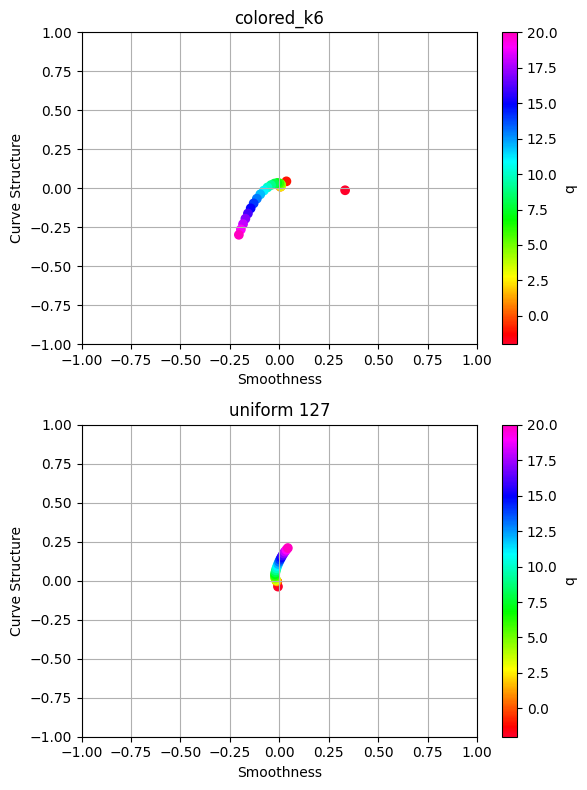

In [13]:
unique_default_images = default_data['image_name'].unique()
fig, axs = plt.subplots(nrows=len(unique_default_images), figsize=(6, 4 * len(unique_default_images)))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current noise_prob
    df_filtered = default_data[default_data['image_name'] == imageName]

    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = axs[i].scatter(df_filtered['Smoothness'], df_filtered['Curve structure'], 
                             c=df_filtered['q'], cmap='gist_rainbow')

    # Add colorbar for each subplot
    cbar = fig.colorbar(scatter, ax=axs[i])
    cbar.set_label('q')

    # Set title and labels for the subplot
    axs[i].set_title(f'{imageName}')
    axs[i].set_xlabel('Smoothness')
    axs[i].set_ylabel('Curve Structure')
    axs[i].set_xlim([-1, 1])
    axs[i].set_ylim([-1, 1])
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/speckle/planes/default_images.png', bbox_inches='tight')
# Show the plot
plt.show()

In [6]:
grouped_default = default_data.groupby('q')[['Smoothness', 'Curve structure', 'Weighted Entropy Correct','Weighted Complexity Correct']].mean()
grouped_default = grouped_default.reset_index()
print(f"Original = {default_data.shape}\nGrouped = {grouped_default.shape}")
# Display the result
grouped_default

Original = (46, 9)
Grouped = (23, 5)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct
0,-2.0,0.163158,-0.025033,0.850862,0.113302
1,-1.0,0.012960,0.018500,0.996175,0.004877
2,0.0,-0.004018,0.005840,0.999697,0.000397
3,1.0,-0.003659,0.003434,0.999656,0.000451
4,2.0,-0.003488,0.005759,0.999464,0.000702
5,3.0,-0.003724,0.010542,0.999142,0.001122
6,4.0,-0.004794,0.017041,0.998595,0.001837
7,5.0,-0.007094,0.024454,0.997609,0.003133
8,6.0,-0.010837,0.031778,0.995789,0.005534
9,7.0,-0.016008,0.037970,0.992547,0.009789


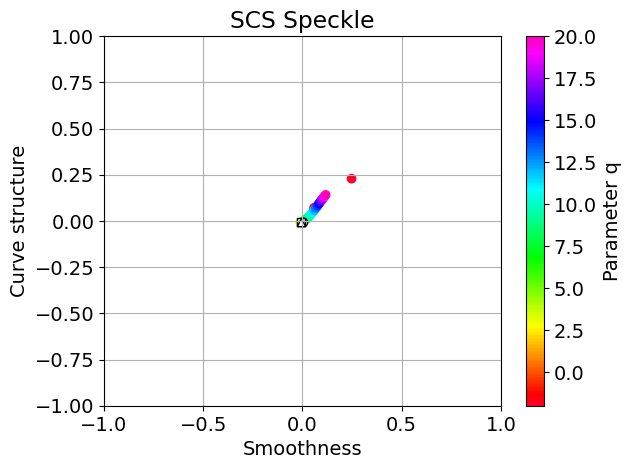

In [22]:
data_ss = grouped_default
plt.figure(1)
plt.rcParams.update({"font.size": 14})
scatter = plt.scatter(data_ss["Smoothness"], data_ss["Curve structure"], c=data_ss['q'], cmap='gist_rainbow')
# Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
special_symbols = {0: 'o', 1: 's', 2: '^'}
for q_value, marker in special_symbols.items():
        subset = data_ss[data_ss['q'] == q_value]
        plt.scatter(subset["Smoothness"], subset["Curve structure"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
        plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid(True)
plt.xlabel('Smoothness')
plt.ylabel('Curve structure')
plt.title(f'SCS Speckle')
plt.colorbar(scatter, label='Parameter q')
# plt.savefig(f'results/sintorn_dataset/planes/SCS_grouped_{images_class}.png', bbox_inches='tight')
plt.show()

Plotting from images

In [7]:
filenames_dataset = dataset_data.image_name.unique()
print(filenames_dataset)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']


In [16]:
chosen_filenames = np.random.choice(filenames_dataset, 10)
print(chosen_filenames)
# dataset_chosen = image_data[image_data['image_name'] == chosen_filename]

['oatmeal01-r000-s001.png' 'knitwear01-r000-s001.png'
 'couscous01-r000-s001.png' 'pearlsugar01-r000-s001.png'
 'wool01-r000-s001.png' 'canesugar01-r000-s001.png'
 'knitwear03-r000-s001.png' 'flaxseed01-r000-s001.png'
 'knitwear02-r000-s001.png' 'rice01-r000-s001.png']


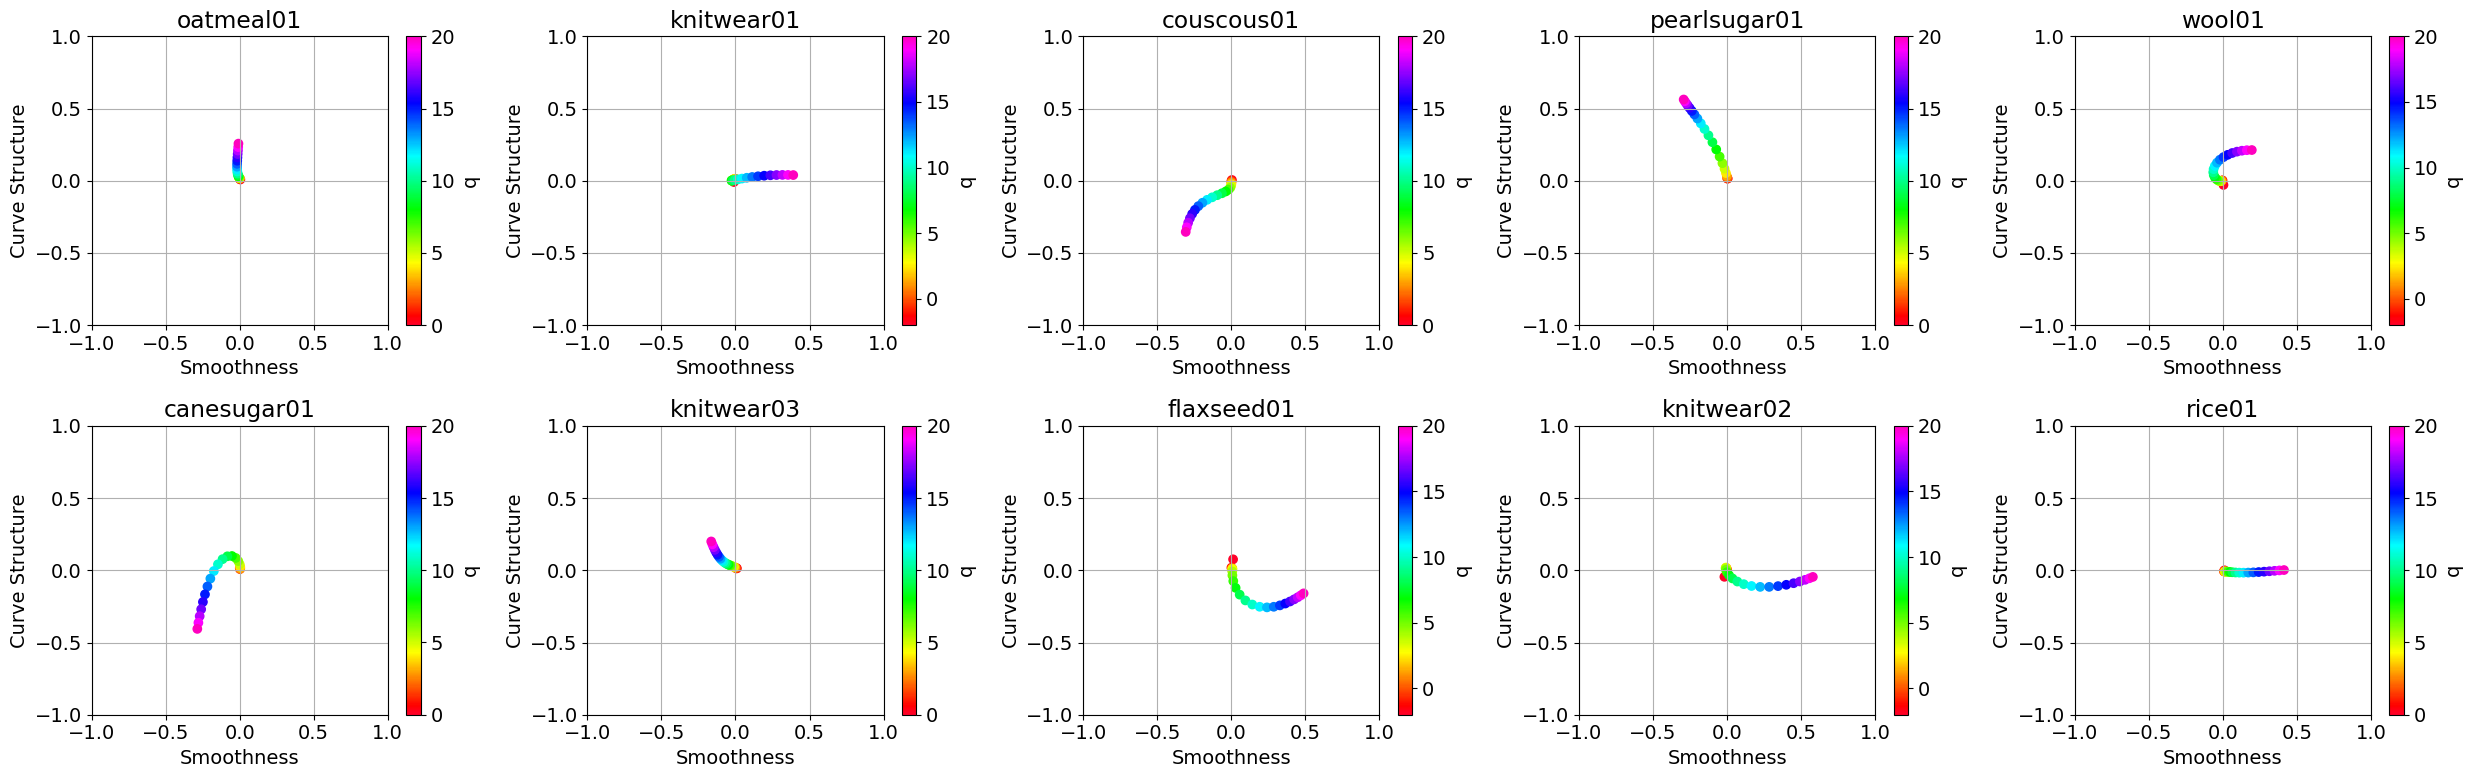

In [36]:
ncolsChosen = 5
nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4 * nrowsChosen))
# Flatten the axs array for easier indexing
axs = axs.flatten()
for i, imageName in enumerate(chosen_filenames):
    # Filter DataFrame for the current noise_prob
    df_filtered = image_data[image_data['image_name'] == imageName]

    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = axs[i].scatter(df_filtered['Smoothness'], df_filtered['Curve structure'], 
                             c=df_filtered['q'], cmap='gist_rainbow')

    # Add colorbar for each subplot
    cbar = fig.colorbar(scatter, ax=axs[i])
    cbar.set_label('q')

    # Set title and labels for the subplot
    axs[i].set_title(f'{imageName.split('-')[0]}')
    axs[i].set_xlabel('Smoothness')
    axs[i].set_ylabel('Curve Structure')
    axs[i].set_xlim([-1, 1])
    axs[i].set_ylim([-1, 1])
    axs[i].grid(True)
# Turn off any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/speckle/planes/speckle_dataset_sample.png', bbox_inches='tight')
# Show the plot
plt.show()